# PyCaret

**PyCaret** is a Python library designed for simplifying the machine learning workflow. It provides an easy-to-use interface for various tasks involved in building machine learning models, such as data preprocessing, model training, hyperparameter tuning, ensemble methods, and model interpretation.

## Installation of pycaret

In [42]:
#pip install pycaret

In [43]:
#pip show scipy

In [44]:
#pip show scikit-plot

In [45]:
#pip install --upgrade scipy scikit-plot

In [46]:
#pip install --upgrade scipy

In [47]:
#pip install scikit-plot==0.3.7

## Importing the classification module from the pycaret library

In [48]:
from pycaret.classification import *

## PyCaret’s built-in dataset for classifying diabetes

In [49]:
from pycaret.datasets import get_data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)  #Code to display complete dataset

In [50]:
#Load the diabetes dataset from PyCaret
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
#data

In [52]:
data.shape    #768 rows & 9 columns

(768, 9)

In [53]:
x=data[data['Class variable'] == 1]['Class variable'].value_counts()
x

Class variable
1    268
Name: count, dtype: int64

In [54]:
y=data[data['Class variable'] == 0]['Class variable'].value_counts()
y

Class variable
0    500
Name: count, dtype: int64

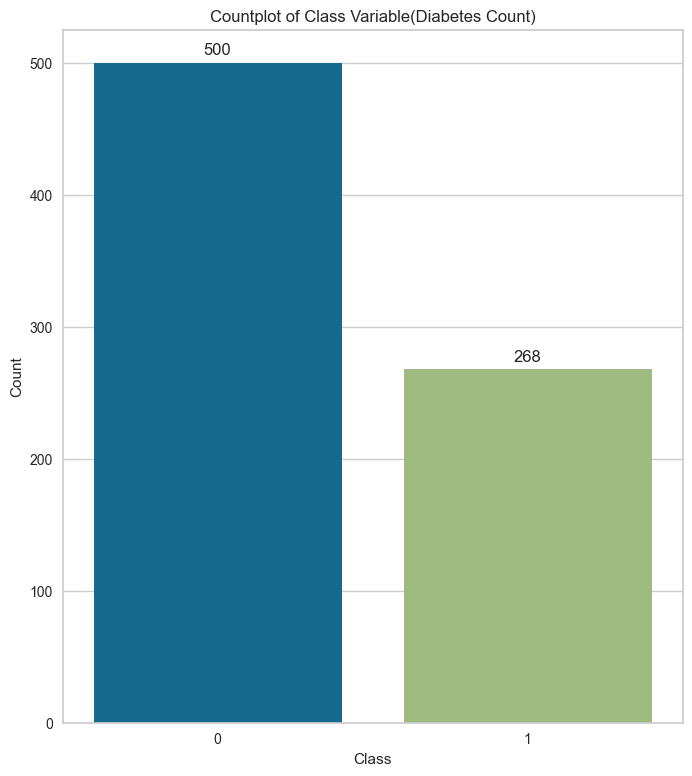

In [55]:
plt.figure(figsize=(6,))
ax = sns.countplot(x=data["Class variable"], data=data)

plt.title('Countplot of Class Variable(Diabetes Count)')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate each count bar with its count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

**Observations:** 
1. Blue Bar indicates no. of people who are not affected by the diabetes(actual). Out of 768, 500 are with no-diabetes
2. Green Bar indicaes no. of people who got affected by the diabete(actual). Out of 768, 268 are affected by diabetes

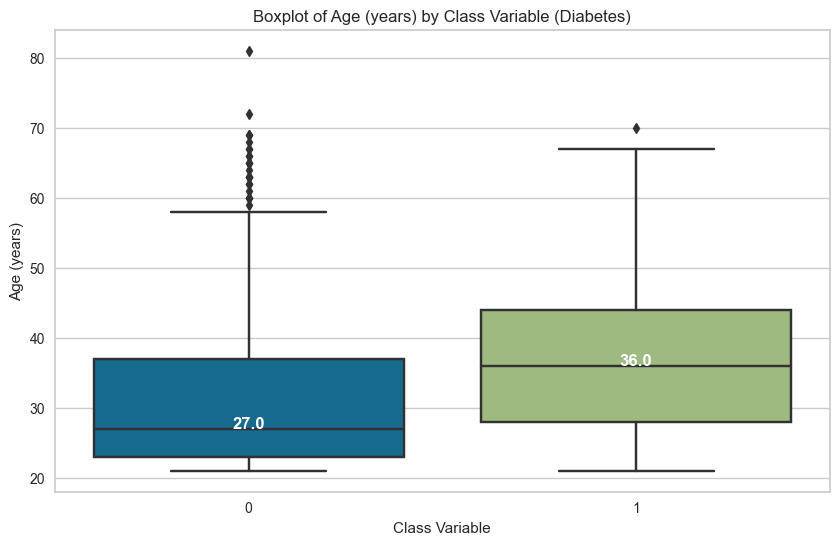

In [56]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class variable", y="Age (years)", data=data)
plt.title('Boxplot of Age (years) by Class Variable (Diabetes)')
plt.xlabel('Class Variable')
plt.ylabel('Age (years)')

# Annotate each boxplot with its median value
medians = data.groupby(['Class variable'])['Age (years)'].median().values
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.1f}', horizontalalignment='center', size='medium', color='white', weight='semibold')

plt.show()

In [57]:
data.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable                                                                int64
dtype: object

In [58]:
data.describe()
#To get statistical report of all numerical columns

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
data.isnull().sum()
#To check the null values in the datset

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable                                                              0
dtype: int64

In [60]:
corr_matrix=data.corr()
corr_matrix

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
Number of times pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Diastolic blood pressure (mm Hg),0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Triceps skin fold thickness (mm),-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
2-Hour serum insulin (mu U/ml),-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Body mass index (weight in kg/(height in m)^2),0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age (years),0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class variable,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Correlation between target variable/dependent variable and independent variable

In [61]:
cor_target = abs(corr_matrix["Class variable"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

Number of times pregnant                                                    0.221898
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.466581
2-Hour serum insulin (mu U/ml)                                              0.130548
Body mass index (weight in kg/(height in m)^2)                              0.292695
Diabetes pedigree function                                                  0.173844
Age (years)                                                                 0.238356
Class variable                                                              1.000000
Name: Class variable, dtype: float64

## Visualization of Correlation matrix

1. In the **correlation matrix**, values are located between -1 and +1. Values close to -1 are interpreted as negative correlations, values close to +1 are interpreted as positive correlations.

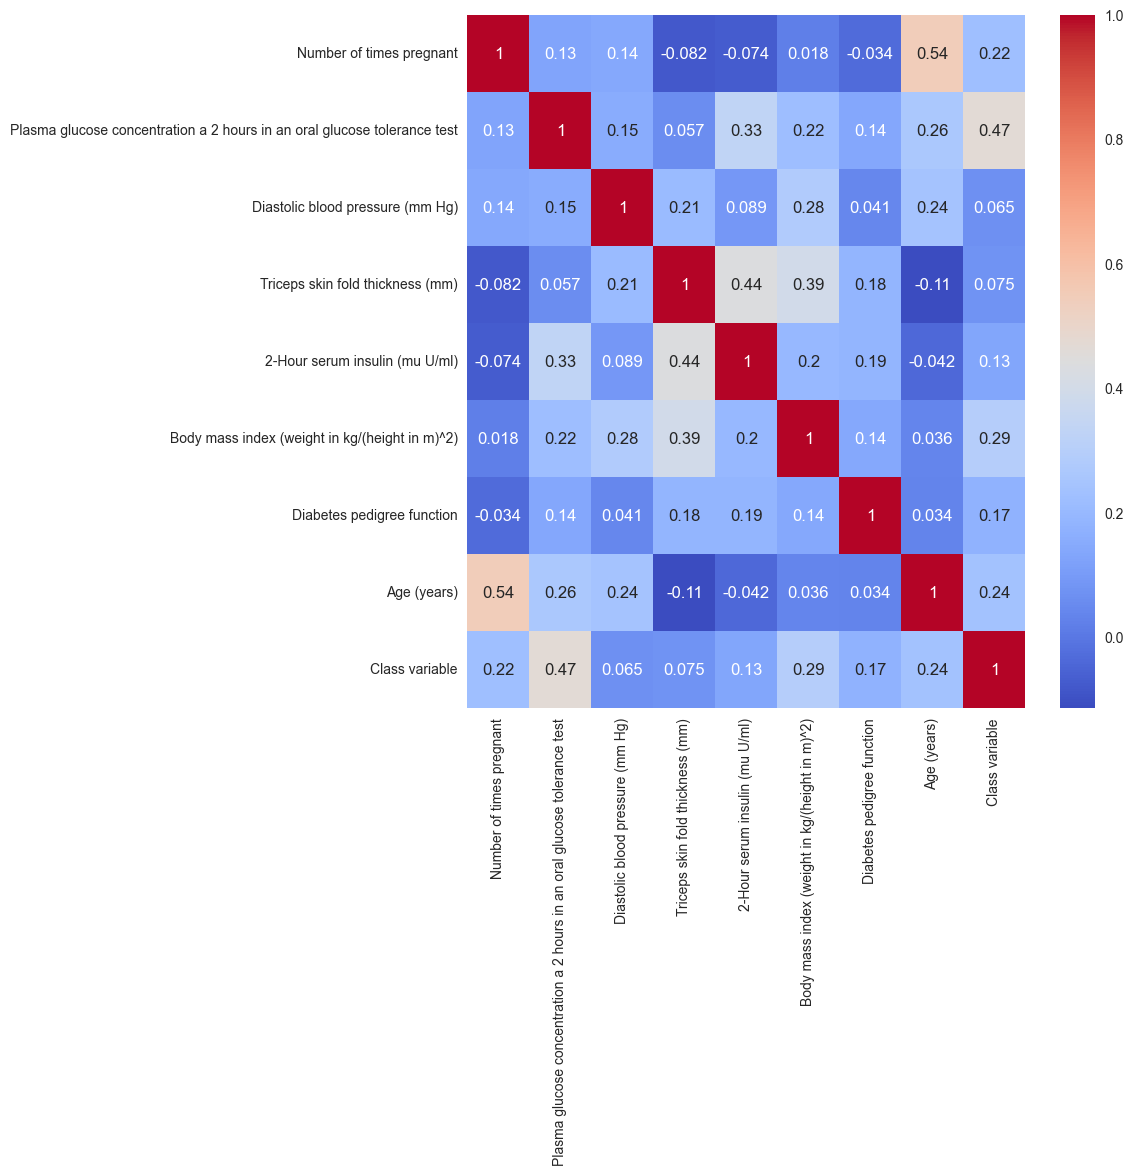

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

## Splitting the Dataset into Training and Test Sets

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#split the dataset into training and test sets
train_data, test_data =train_test_split(data,test_size=0.3,train_size=0.7,random_state=42)

In [65]:
train_data.shape

(537, 9)

In [66]:
test_data.shape

(231, 9)

## Setting up PyCaret Environment

In [67]:
from pycaret.classification import setup

In [68]:
# Setting up the PyCaret environment with the training data and generating a profile report
clf1 = setup(data = train_data, target = 'Class variable')
#data = train_data: This parameter specifies the dataset you want to use for modeling.
#target = 'Class variable': This parameter specifies the target variable (i.e., the variable you want to predict) in your dataset.
#After running this code, PyCaret will preprocess your data, perform automatic feature engineering, handle missing values, and set up the environment for training and evaluating classification models.
#It will also display a summary of the data preprocessing steps performed.

,Description,Value
0,Session id,2893
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(537, 9)"
4,Transformed data shape,"(537, 9)"
5,Transformed train set shape,"(375, 9)"
6,Transformed test set shape,"(162, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


## Model Training & Evaluation

In [69]:
#Comparing all models 
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7831,0.8213,0.5934,0.7374,0.6523,0.4985,0.5085,0.0700
ridge,Ridge Classifier,0.7757,0.0000,0.5407,0.7578,0.6275,0.4734,0.4897,0.0100
rf,Random Forest Classifier,0.7699,0.8259,0.5857,0.7068,0.6349,0.4708,0.4786,0.0730
lr,Logistic Regression,0.7676,0.8319,0.5560,0.7258,0.6276,0.4625,0.4731,0.0190
lda,Linear Discriminant Analysis,0.7676,0.8340,0.5407,0.7323,0.6196,0.4575,0.4704,0.0130
gbc,Gradient Boosting Classifier,0.7622,0.8346,0.6165,0.6825,0.6444,0.4665,0.4707,0.0500
catboost,CatBoost Classifier,0.7591,0.8252,0.5857,0.6747,0.6226,0.4488,0.4537,0.8770
nb,Naive Bayes,0.7463,0.7982,0.5484,0.6673,0.6006,0.4176,0.4229,0.0120
lightgbm,Light Gradient Boosting Machine,0.7433,0.8017,0.6088,0.6368,0.6193,0.4267,0.4293,0.0590
ada,Ada Boost Classifier,0.7354,0.7544,0.5560,0.6486,0.5934,0.3998,0.4059,0.0400


## Best Model Selection

In [70]:
#Picking the winner 
best_model = automl(optimize = 'Accuracy')

In [71]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2893, verbose=0,
                     warm_start=False)

In [72]:
#Fine-tuning the best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.8943,0.7857,0.7857,0.7857,0.6607,0.6607
1,0.8421,0.8646,0.7692,0.7692,0.7692,0.6492,0.6492
2,0.7105,0.7585,0.6154,0.5714,0.5926,0.3686,0.3692
3,0.7632,0.7908,0.6923,0.6429,0.6667,0.4834,0.4842
4,0.7105,0.8400,0.7692,0.5556,0.6452,0.4113,0.4268
5,0.7297,0.8221,0.6923,0.6000,0.6429,0.4272,0.4301
6,0.7027,0.7276,0.6923,0.5625,0.6207,0.3805,0.3861
7,0.8108,0.7949,0.5385,0.8750,0.6667,0.5448,0.5761
8,0.7568,0.7756,0.5385,0.7000,0.6087,0.4365,0.4445


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [73]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2893, verbose=0,
                     warm_start=False)

## Making Predictions and Evaluating the Model

In [74]:
predictions = predict_model(tuned_best_model, data = test_data)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7576,0.7945,0.6000,0.6667,0.6316,0.4517,0.4531


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
668,6,98,58,33,190,34.000000,0.430,43,0,0,0.70
324,2,112,75,32,0,35.700001,0.148,21,0,0,0.70
624,2,108,64,0,0,30.799999,0.158,21,0,0,0.87
690,8,107,80,0,0,24.600000,0.856,34,0,0,0.53
473,7,136,90,0,0,29.900000,0.210,50,0,0,0.68
...,...,...,...,...,...,...,...,...,...,...,...
619,0,119,0,0,0,32.400002,0.141,24,1,0,0.60
198,4,109,64,44,99,34.799999,0.905,26,1,0,0.75
538,0,127,80,37,210,36.299999,0.804,23,0,0,0.61
329,6,105,70,32,68,30.799999,0.122,37,0,0,0.87


In [75]:
predictions_df = pd.DataFrame(predictions, columns=['Class variable', 'prediction_label'])

In [76]:
predictions_df

,Class variable,prediction_label
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
619,1,0
198,1,0
538,0,0
329,0,0


In [77]:
#Find how many got affected by diabetes(Predicted)?
predictions_df.prediction_label.value_counts()

prediction_label
0    159
1     72
Name: count, dtype: int64

## Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(predictions['Class variable'], predictions['prediction_label'])
print('Confusion Matrix:')
print(confusion_matrix)

Confusion Matrix:
[[127  24]
 [ 32  48]]


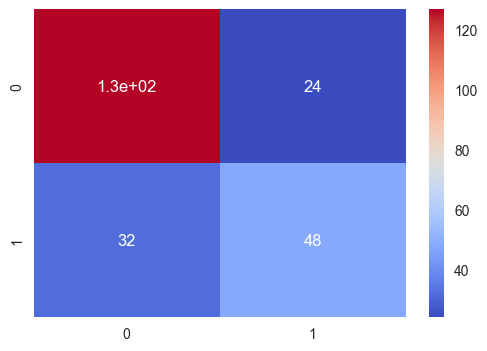

In [79]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix,annot=True,cmap="coolwarm")
plt.show()

1. **True Negative (TN):** The number of observations that were **correctly predicted as negative (class 0).**
2. **False Positive (FP):** The number of observations that were **incorrectly predicted as positive (class 1) when they were actually negative.**
3. **False Negative (FN):** The number of observations that were **incorrectly predicted as negative (class 0) when they were actually positive.**
4. **True Positive (TP):** The number of observations that were **correctly predicted as positive (class 1).**

**Note:** "1.2e+02" means 1.2×10^2, which equals 120

## Accuracy

In [80]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(predictions['Class variable'], predictions["prediction_label"])
print("Accuracy:",Accuracy)

Accuracy: 0.7575757575757576


## Classification report

In [81]:
from sklearn.metrics import classification_report
report = classification_report(predictions['Class variable'], predictions['prediction_label'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       151
           1       0.67      0.60      0.63        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



1. **Precision:** TP / (TP + FP)
2. **Recall:** TP / (TP + FN)
3. **F1-score:** 2 * (precision * recall) / (precision + recall)
4. **Accuracy:** (TP + TN) / (TP + TN + FP + FN)